# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

План работы:
- изучить общую информацию
- предобработать данные
- добавить столбцы
- провести исследовательский анализ данных
- сделать выводы.

### Подготовка данных

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


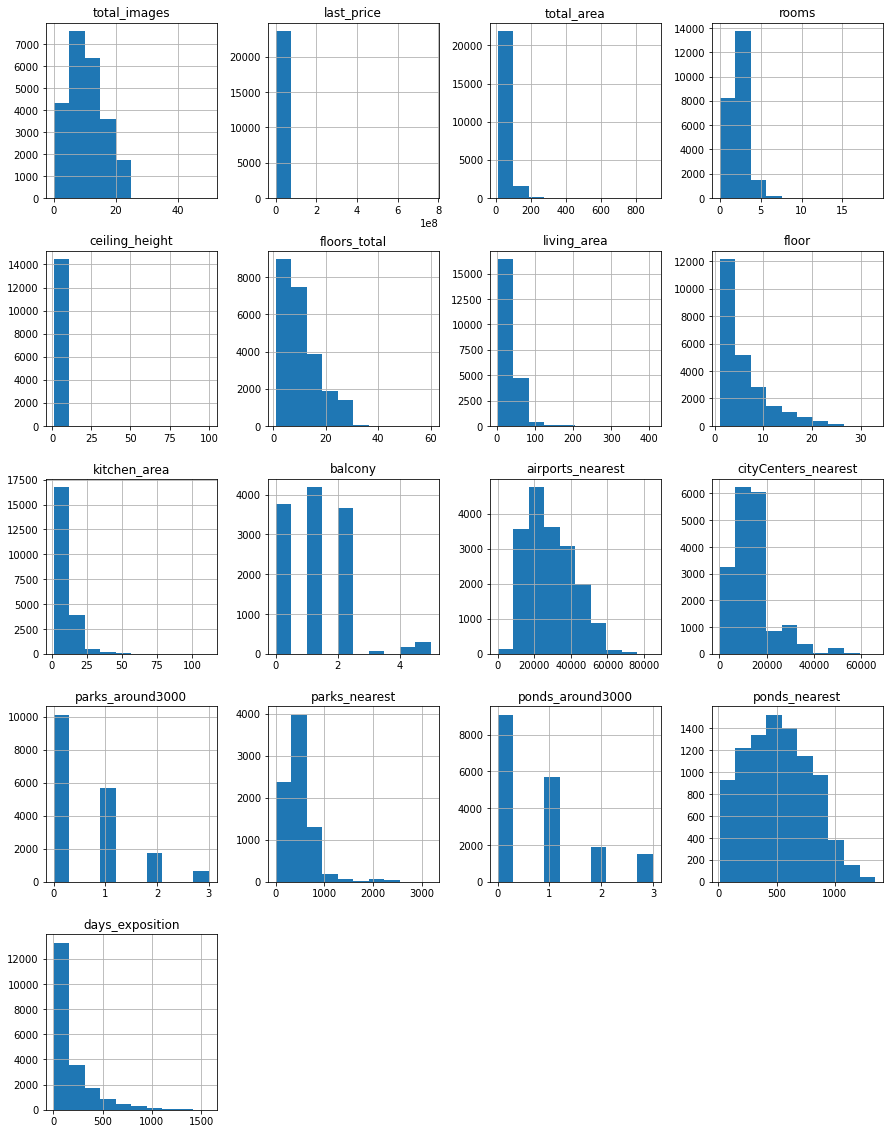

In [4]:
data.hist(figsize=(15, 20));

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


На первый взгляд видно отсутсвие всех значений в столбце is_apartment. cityCenters_nearest - надо привести к змеиному регистру

### Предобработка данных

In [6]:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [8]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [9]:
data['is_apartment'] = data['is_apartment'].astype(bool) # поменяли тип данных в столбц
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

Пропущенные значения встретились вероятно потому, что квартира не аппартаментного типа и это не указывали в объявлении. Если это аппартаменты, то указывали. Поэтому большая часть заполнилась как False.

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))



In [11]:
data['kf_area'] = data['total_area'] / (data['kitchen_area'] + data['living_area'])
data['kf_area'].describe()

count    23502.000000
mean         1.353664
std          0.229394
min          0.487988
25%          1.265969
50%          1.333333
75%          1.413529
max         18.547297
Name: kf_area, dtype: float64

Добавил столбец, который показывает отношение площади к сумме площадей. Медианой является число 1.33, на него и умножим столбцы, где площадь меньше либо равна сумме площадей кухни и жилой.

In [12]:
data[data['total_area'] <= (data['kitchen_area'] + data['living_area'])]['total_area']

184      30.20
220      37.00
227      47.00
237      28.10
322      25.00
         ...  
23202    67.92
23297    48.20
23579    24.80
23613    52.00
23680    59.00
Name: total_area, Length: 372, dtype: float64

In [13]:
data.loc[(data['total_area'] <= (data['kitchen_area'] + data['living_area'])), 'total_area'] = 1.34 * (data['kitchen_area'] + data['living_area'])
data[data['total_area'] <= (data['kitchen_area'] + data['living_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kf_area


In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
kf_area                   197
dtype: int64

Причины пропусков в столбцах бывают разные. Данных о балконах  может не хватать, потому что их нет в квартире. В столбце 'is_apartment' был указан не тот тип данных. Картографиские данные ,вероятно, пропущены из-за отсутствия по близости картографических особенностей. Заполнил пропуски в living_area и в kitchen_area медианным значением по количеству комнат. Возможно в неккоторых строках общая площадь меньше суммы жилой площади и кухни. Исправил это при помощи коэффициента отношения площади кухни и жилой площади к общей площади

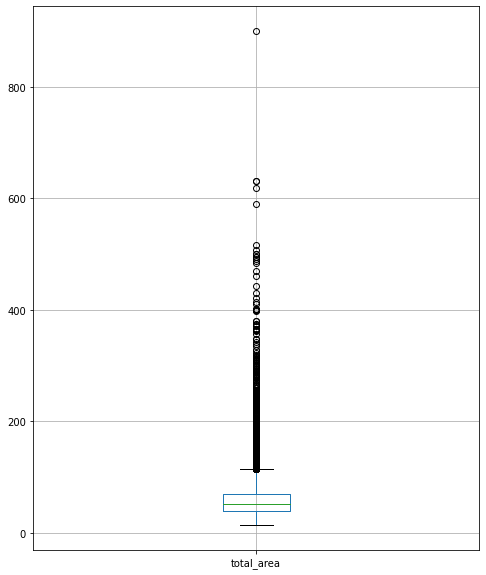

In [15]:
data.boxplot(column=['total_area'], figsize=(8, 10));

In [16]:
data.groupby('total_area')['total_area'].count()

total_area
14.0     1
15.5     1
16.0     1
17.0     2
18.0     2
        ..
590.0    1
618.0    1
631.0    1
631.2    1
900.0    1
Name: total_area, Length: 2313, dtype: int64

Видим выбросы около после 250.

In [17]:
data = data[data['total_area'] < 250] # избавляемся от выбросов

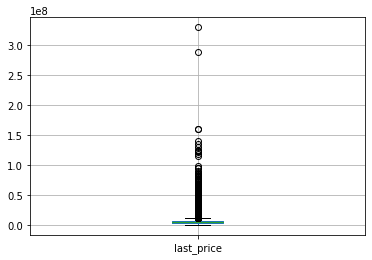

In [18]:
data.boxplot(column=['last_price']);


In [19]:
data = data[data['last_price'] < 170000000]  # избавляемся от выбросов 

In [20]:
data.groupby('rooms')['rooms'].count()

rooms
0      196
1     8046
2     7939
3     5804
4     1168
5      294
6       83
7       37
8        7
9        2
10       1
11       2
14       1
Name: rooms, dtype: int64

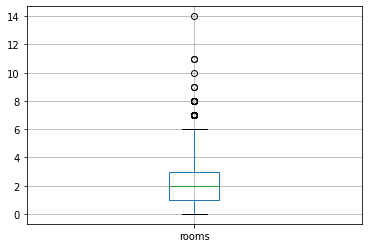

In [21]:
data.boxplot(column=['rooms']);
data = data[data['rooms'] < 8]  # избавляемся от выбросов


Квартиры с 8мью комнтами и больше встречаются редко, отбросим их.

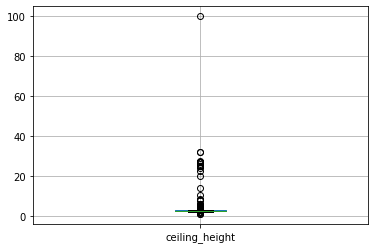

In [22]:
data.boxplot(column=['ceiling_height']);

По графику ничего непонятно, надо разбираться.

In [23]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kf_area
total_images,1.000000,0.131000,0.120679,0.101000,-0.003691,0.011417,0.109477,0.031105,0.039427,-0.029258,-0.023895,0.099885,0.049499,-0.002954,-0.046264,0.020034,-0.008199,-0.014461,-0.001330,-0.028603,0.010300
last_price,0.131000,1.000000,0.712158,0.424681,0.096319,0.015720,0.595434,0.035869,-0.006238,-0.038453,-0.020007,0.534819,0.017250,-0.034729,-0.289969,0.205530,-0.007249,0.203672,-0.118733,0.115393,0.183655
total_area,0.120679,0.712158,1.000000,0.788075,0.094711,-0.064865,0.918148,-0.027523,-0.021956,-0.085783,-0.050128,0.566237,0.026680,-0.032054,-0.245077,0.165893,-0.010347,0.171057,-0.092519,0.160630,0.165999
rooms,0.101000,0.424681,0.788075,1.000000,0.045640,-0.228371,0.872083,-0.156557,-0.011673,-0.155447,-0.091277,0.223414,-0.009632,-0.059012,-0.174927,0.125034,-0.051302,0.086388,-0.047965,0.121925,-0.102996
ceiling_height,-0.003691,0.096319,0.094711,0.045640,1.000000,-0.026585,0.084249,-0.011040,-0.031676,0.001906,0.043031,0.079080,0.032072,-0.023115,-0.088283,0.062604,-0.017142,0.076592,-0.058542,0.016769,0.000031
floors_total,0.011417,0.015720,-0.064865,-0.228371,-0.026585,1.000000,-0.175249,0.677800,-0.002823,0.070028,0.051547,0.173727,0.172679,0.107561,0.015732,-0.250409,0.096629,-0.120358,0.036483,-0.050571,0.153954
living_area,0.109477,0.595434,0.918148,0.872083,0.084249,-0.175249,1.000000,-0.110450,-0.021533,-0.063283,-0.034603,0.347976,-0.001633,-0.059615,-0.228491,0.173625,-0.048901,0.143298,-0.071209,0.146692,-0.119332
floor,0.031105,0.035869,-0.027523,-0.156557,-0.011040,0.677800,-0.110450,1.000000,-0.006051,0.036947,0.036102,0.136188,0.169133,0.071043,0.008086,-0.162923,0.073624,-0.075882,0.024426,-0.039448,0.117113
is_apartment,0.039427,-0.006238,-0.021956,-0.011673,-0.031676,-0.002823,-0.021533,-0.006051,1.000000,0.003671,0.001545,-0.018637,-0.155020,0.007994,0.000751,-0.002646,-0.018453,-0.010348,0.020441,-0.063697,0.013373
studio,-0.029258,-0.038453,-0.085783,-0.155447,0.001906,0.070028,-0.063283,0.036947,0.003671,1.000000,-0.004227,-0.005368,0.028823,-0.021991,-0.007507,-0.030066,0.009028,0.001237,0.002291,-0.022372,-0.042667


Больше всего на высоту потолков влияет количество этажей в доме. Заполним пропуски медианным значением по количеству этажей. Но сначала надо исправить ошибки.

In [24]:
data.duplicated().sum() # явных дубликатов нет

0

In [25]:
(data['locality_name'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [26]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex = True)
data['locality_name'] = data['locality_name'].str.replace('городской ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('поселок ', 'поселок', regex = True)
data['locality_name'] = data['locality_name'].str.replace('поселок', 'поселок ', regex = True)
data['locality_name'] = data['locality_name'].str.replace('городской ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace(' Пансионат', '', regex = True)





In [27]:
len(data['locality_name'].unique())

322

In [28]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.5 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.  ,   2.79,   2.95,
         4.06,   2.94,   3.54,   3.53,   2.83,   2.4 ,   3.38,   3.01,
         3.65,   3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,
         3.98,   2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,
         3.87,   3.66,   3.85,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,   3.86,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,
         8.  ,   3.16,   3.26,   3.34,   2.81,   3.44,   2.97,   4.37,
      

In [29]:
data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75)
data['ceiling_height'] = data['ceiling_height'].replace(32., 3.2)
data['ceiling_height'] = data['ceiling_height'].replace(26., 2.6)
data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26)
data['ceiling_height'] = data['ceiling_height'].replace(24., 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(25., 2.5)
data['ceiling_height'] = data['ceiling_height'].replace(20., 2.)
data['ceiling_height'] = data['ceiling_height'].replace(27., 2.7) #поменяли часть значений с опечатками. Остальные странные значения придется удалить


In [30]:
data_tranc_ceil = data.groupby('floors_total')['ceiling_height'].transform('median')
data['ceiling_height'] = data['ceiling_height'].fillna(data_tranc_ceil)
data_tranc_ceil

0        2.70
1        2.75
2        2.55
3        2.60
4        2.60
         ... 
23694    2.55
23695    2.55
23696    2.80
23697    2.70
23698    2.55
Name: ceiling_height, Length: 23567, dtype: float64

In [31]:
data = data[(data['ceiling_height'] > 2.4)&(data['ceiling_height'] < 4)]

Нижнюю планку установили в соответсвии с нормами высоты потолков, отбросили аномальные значения.


In [32]:
data.groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
2.45    15
2.46     2
2.47     3
2.48     8
2.49     1
        ..
3.88     1
3.90    10
3.93     1
3.95     8
3.98     1
Name: ceiling_height, Length: 135, dtype: int64

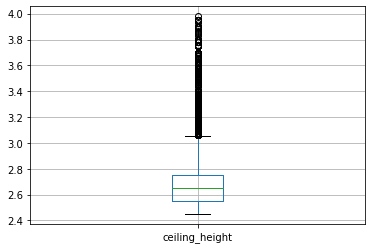

In [33]:
data.boxplot(column=['ceiling_height']);

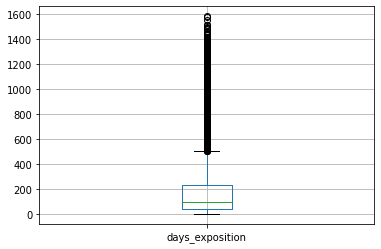

In [34]:
data.boxplot(column=['days_exposition']);

In [35]:
data.groupby('days_exposition')['days_exposition'].count()

days_exposition
1.0         1
2.0         3
3.0       157
4.0       176
5.0       151
         ... 
1512.0      2
1513.0      1
1553.0      1
1572.0      1
1580.0      1
Name: days_exposition, Length: 1134, dtype: int64

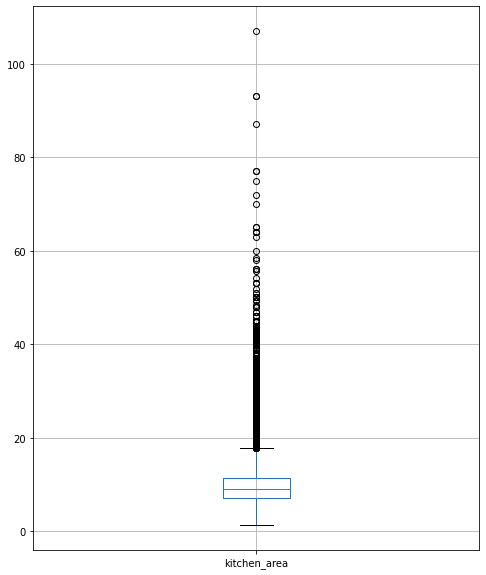

In [36]:
data.boxplot(column=['kitchen_area'], figsize=(8, 10));

In [37]:
data = data[(data['kitchen_area']<45)]

In [38]:
data.groupby('kitchen_area')['kitchen_area'].count()

kitchen_area
1.30     1
2.00     7
2.30     1
2.40     1
2.89     1
        ..
43.40    3
43.80    1
44.00    3
44.70    2
44.90    1
Name: kitchen_area, Length: 911, dtype: int64

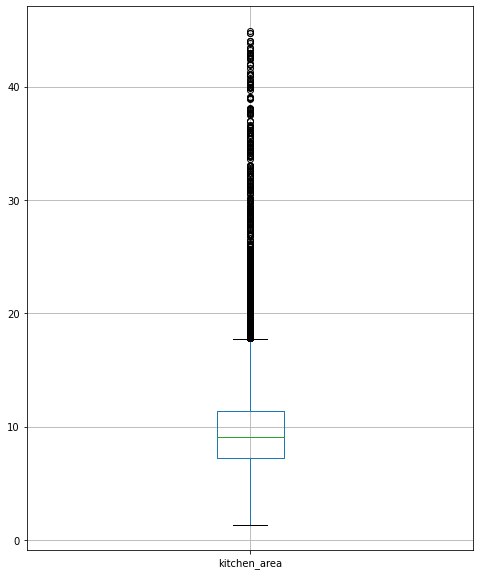

In [39]:
data.boxplot(column=['kitchen_area'], figsize=(8, 10));

Проверили и убрали выбросы в столбце kitchen_area.

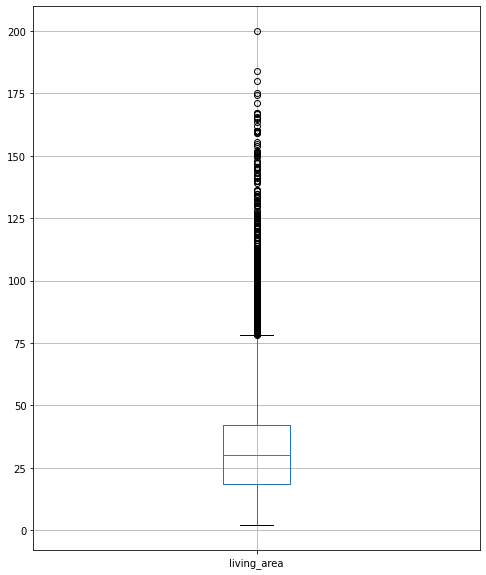

In [40]:
data.boxplot(column=['living_area'], figsize=(8, 10));

In [41]:
data.groupby('living_area')['living_area'].count()

living_area
2.0      1
3.0      2
5.4      1
6.0      1
6.5      1
        ..
174.3    1
175.0    1
180.0    1
184.0    1
200.0    1
Name: living_area, Length: 1678, dtype: int64

In [42]:
data = data[(data['living_area']<150) & (data['living_area']>10)]

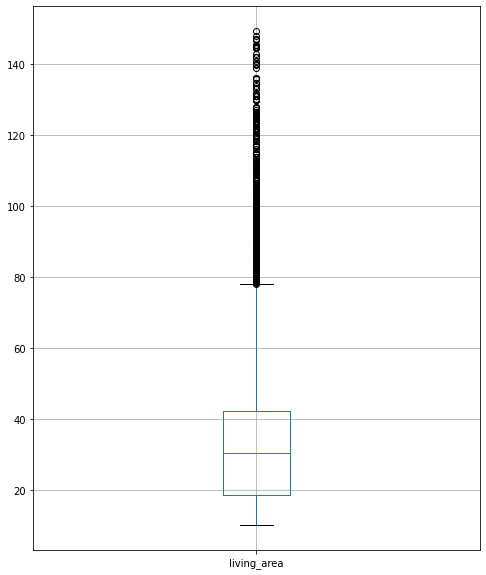

In [43]:
data.boxplot(column=['living_area'], figsize=(8, 10));

Проверили и убрали выбросы в столбце living_area.

In [44]:
data1 = data[['total_area', 'kitchen_area', 'living_area', 'rooms', 'last_price', 'days_exposition', 'city_centers_nearest', 'ceiling_height']].copy()
data1.corr()

,total_area,kitchen_area,living_area,rooms,last_price,days_exposition,city_centers_nearest,ceiling_height
total_area,1.000000,0.561046,0.917275,0.787304,0.714724,0.153233,-0.239698,0.398634
kitchen_area,0.561046,1.000000,0.345940,0.214003,0.494818,0.098829,-0.183583,0.352451
living_area,0.917275,0.345940,1.000000,0.884178,0.599114,0.141037,-0.224558,0.340246
rooms,0.787304,0.214003,0.884178,1.000000,0.431134,0.115236,-0.172372,0.202309
last_price,0.714724,0.494818,0.599114,0.431134,1.000000,0.109301,-0.294470,0.377511
days_exposition,0.153233,0.098829,0.141037,0.115236,0.109301,1.000000,-0.053494,0.100426
city_centers_nearest,-0.239698,-0.183583,-0.224558,-0.172372,-0.294470,-0.053494,1.000000,-0.300169
ceiling_height,0.398634,0.352451,0.340246,0.202309,0.377511,0.100426,-0.300169,1.000000


Достоверно заполнить пропкски в days_exposition	мы не можем.

In [45]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              47
airports_nearest         5406
city_centers_nearest     5386
parks_around3000         5385
parks_nearest           15240
ponds_around3000         5385
ponds_nearest           14268
days_exposition          3072
kf_area                     0
dtype: int64

In [46]:
data=data.dropna(subset=['locality_name', 'floors_total'])

Удалил пропуски в столбцах, где их немного. На общий вид датафрейма они не повлияют.

In [47]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5397
city_centers_nearest     5377
parks_around3000         5376
parks_nearest           15200
ponds_around3000         5376
ponds_nearest           14242
days_exposition          3068
kf_area                     0
dtype: int64

In [48]:
data['last_price'] = data['last_price']/1000000 # теперь значение в 'last_price' в млн рублей

In [49]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kf_area
count,22968.000000,22968.000000,22968.000000,22968.000000,22968.000000,22968.000000,22968.000000,22968.000000,22968.000000,22968.000000,17571.000000,17591.000000,17592.000000,7768.000000,17592.000000,8726.000000,19900.000000,22968.000000
mean,9.867076,6.026765,58.875015,2.055686,2.699029,10.675766,33.401126,5.867294,10.186325,0.592041,28854.748392,14310.614121,0.603399,491.686921,0.759209,520.654595,180.117085,1.350007
std,5.661437,5.791659,27.298526,0.987045,0.208901,6.573956,17.552473,4.858773,4.647307,0.960341,12689.832493,8609.635978,0.794283,343.044119,0.932489,277.893583,218.679599,0.177876
min,0.000000,0.012190,14.000000,1.000000,2.450000,1.000000,10.080000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.487988
25%,6.000000,3.450000,40.250200,1.000000,2.550000,5.000000,18.500000,2.000000,7.200000,0.000000,18496.000000,9467.000000,0.000000,288.000000,0.000000,297.000000,45.000000,1.266667
50%,9.000000,4.600000,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.040000,0.000000,26890.000000,13161.000000,0.000000,455.000000,0.000000,505.000000,95.000000,1.333333
75%,14.000000,6.700000,69.200000,3.000000,2.750000,16.000000,42.300000,8.000000,11.360000,1.000000,37407.000000,16318.500000,1.000000,613.000000,1.000000,733.000000,230.000000,1.412214
max,50.000000,160.000000,248.700000,7.000000,3.980000,60.000000,149.400000,33.000000,44.900000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,4.987277


С пропусками столкнулся в kitchen_area, balcony, days_exposition, locality_name, ceiling_height, а также в картографических данных, которые я не могу заполнить или удалить, потому что их слишком много. Отбросил аномальные зачения в столбцах. Заполнил пропуски в столбцах медианным значением в зависимости от коэффициента Пирсона. Удалил оставшиеся строки с пропусками. В общем датафрейм сократился на 3.5%.

### Добавление столбцов

In [50]:
data['price_metr'] = data['last_price']/data['total_area']


In [51]:
data['day'] = data['first_day_exposition'].dt.dayofweek

In [52]:
data['mounth'] = data['first_day_exposition'].dt.month

In [53]:
data['year'] = data['first_day_exposition'].dt.year

In [54]:
def category_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == floors_total:
        return 'Последний'
    elif floor == 1:
        return 'Первый'
    else:
        return 'Другой'
data['cat_floor'] = data.apply(category_floor, axis=1)

In [55]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kf_area,price_metr,day,mounth,year,cat_floor,city_centers_nearest_km
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,1.421053,0.120370,3,3,2019,Другой,16.0
1,7,3.350,40.40,2018-12-04,1,2.75,11.0,18.60,1,True,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1.364865,0.082921,1,12,2018,Первый,19.0
2,10,5.196,56.00,2015-08-20,2,2.55,5.0,34.30,4,True,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1.314554,0.092786,3,8,2015,Другой,14.0
3,0,64.900,159.00,2015-07-24,3,2.60,14.0,45.00,9,True,False,False,9.50,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2.917431,0.408176,4,7,2015,Другой,7.0
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1.369863,0.100000,1,6,2018,Другой,8.0
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,False,False,9.10,0.0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,1.293617,0.095066,0,9,2018,Другой,NaN
6,6,3.700,37.30,2017-11-02,1,2.66,26.0,10.60,6,True,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,1.492000,0.099196,3,11,2017,Другой,19.0
7,5,7.915,71.60,2019-04-18,2,2.75,24.0,30.50,22,True,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,1.449393,0.110545,3,4,2019,Другой,12.0
8,20,2.900,33.16,2018-05-23,1,2.70,27.0,15.43,26,True,False,False,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,1.367987,0.087455,2,5,2018,Другой,NaN
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,1.217565,0.088525,6,2,2017,Другой,15.0


Добавил столбцы:
price_metr - Цена квадратного метра, 
day - день недели когда размещено обьявление(0-понедельник), 
mounth - месяц, 
yeaer - год, 
cat_floor - категория этажей(первый, последний, другой), 
city_centers_nearest_km - расстояние до центра в км.

### Исследовательский анализ данных

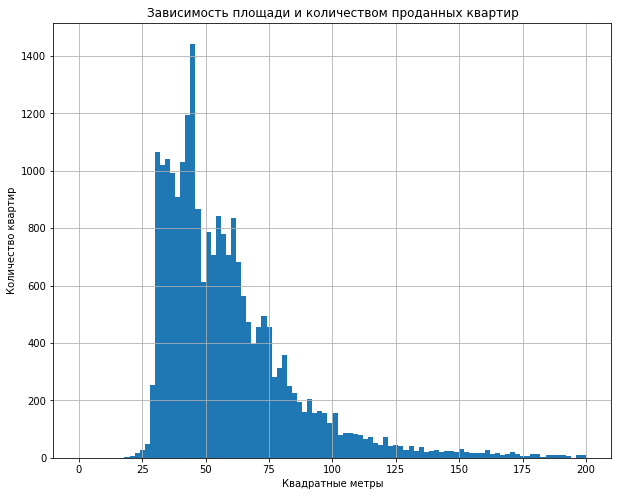

In [90]:
 
data['total_area'].hist(bins=100, range=(0, 200), figsize=(10, 8))
plt.title('Зависимость площади и количеством проданных квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Пик  47 квадрантых метров , спад после 60 кв. метров. Чем больше метров, тем меньше квартир.

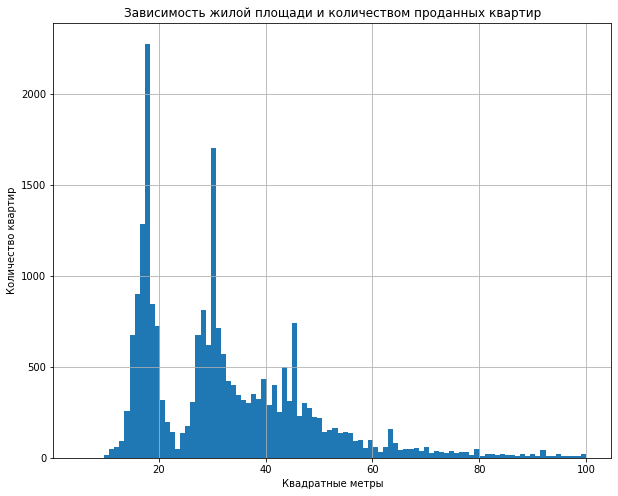

In [57]:

data['living_area'].hist(bins=100, range=(5, 100), figsize=(10, 8))
plt.title('Зависимость жилой площади и количеством проданных квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Пик 18 кв. метров из-за однушек, спад после 20 кв. метров. Новый пик на 30 для двушек и для трешек 47 метров в квадрате.


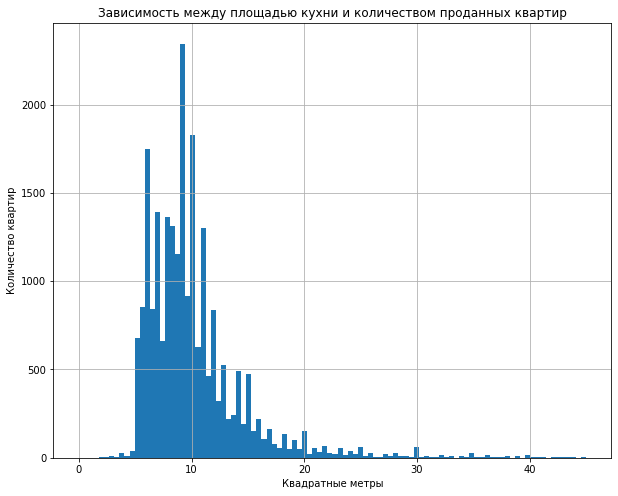

In [58]:

data['kitchen_area'].hist(bins=100, range=(0, 45), figsize=(10, 8))
plt.title('Зависимость между площадью кухни и количеством проданных квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир с  площадью от 6 до 10 кв. метров, затем с ростом площади количество квартир плавно падает. Присутствуют квартиры без кухни.

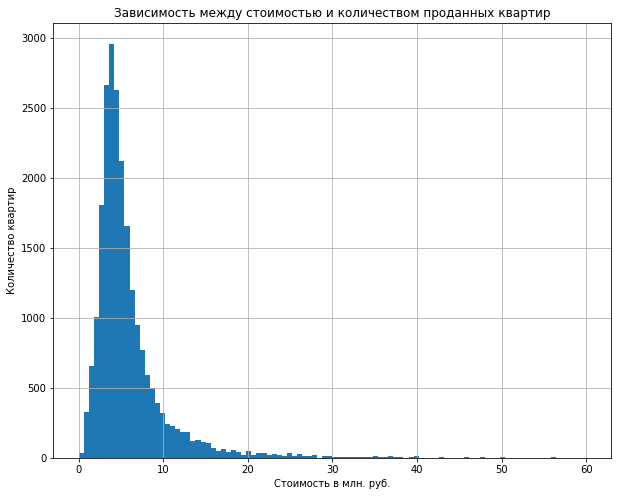

In [59]:

data['last_price'].hist(bins=100, range=(0, 60), figsize=(10, 8))
plt.title('Зависимость между cтоимостью и количеством проданных квартир')
plt.xlabel('Стоимость в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир стоят в пределах 10 млн рублей. Чем дороже квартира, тем меньше конкуренция.

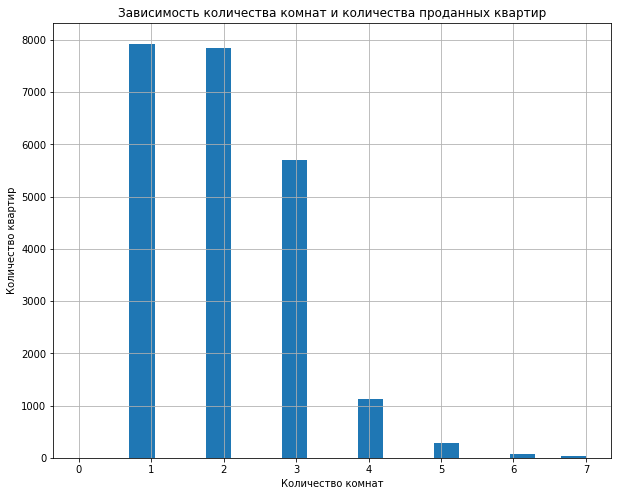

In [60]:

data['rooms'].hist(bins=20, range=(0, 7), figsize=(10, 8))
plt.title('Зависимость количества комнат и количества проданных квартир')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Чаще встречаются двушки и однушки, квартиры с 4 и более комнатами - редкость.

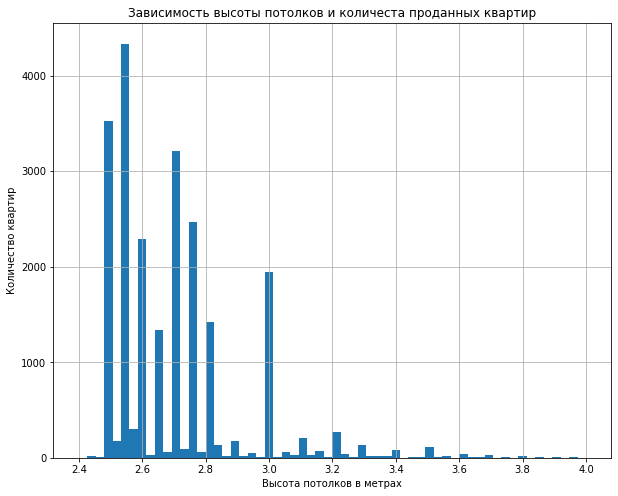

In [61]:

data['ceiling_height'].hist(bins=60, range=(2.4, 4), figsize=(10, 8))
plt.title('Зависимость высоты потолков и количеста проданных квартир')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество квартир')
plt.show()

 Большинство квартир с высотой потолков от 2.5 до 2.8 метров. Много квартир с потолками 3 метра. Чем выше потолки, тем меньше объявлений. 

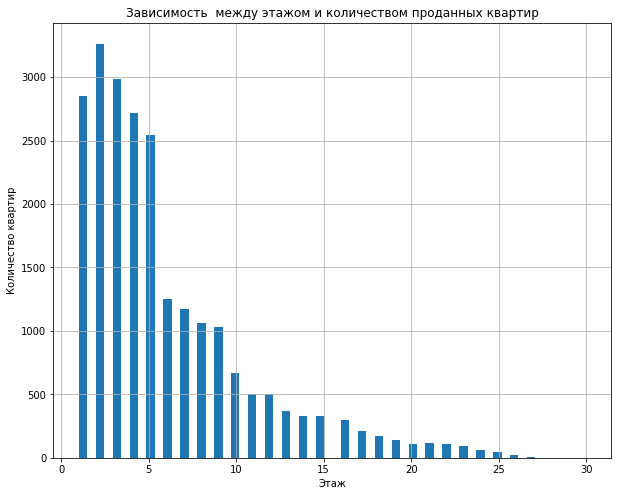

In [62]:

data['floor'].hist(bins=60, range=(1, 30), figsize=(10, 8))
plt.title('Зависимость  между этажом и количеством проданных квартир')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир располагаюися на 1-5 этажах.Наверное роль сыграли пятиэтажки. Квартир выше 20 этажа крайне мало.

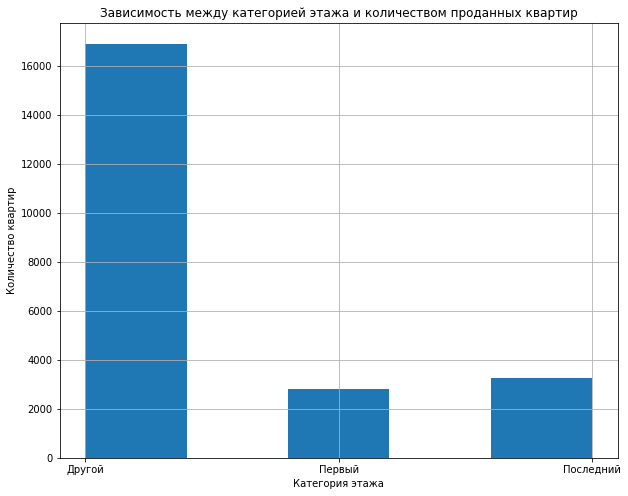

In [63]:

data['cat_floor'].hist(bins=5, range=(0, 2), figsize=(10, 8))
plt.title('Зависимость между категорией этажа и количеством проданных квартир')
plt.xlabel('Категория этажа')
plt.ylabel('Количество квартир')
plt.show()

Квартир на последних и первых этажах примерно одинаково, около 3 тысяч.

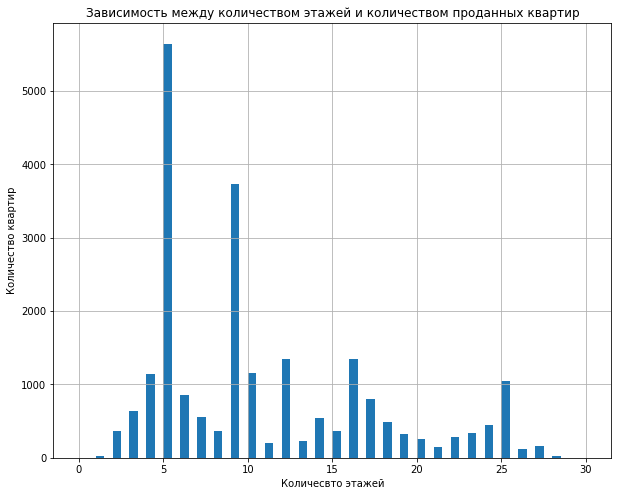

In [64]:

data['floors_total'].hist(bins=60, range=(0, 30), figsize=(10, 8))
plt.title('Зависимость между количеством этажей и количеством проданных квартир')
plt.xlabel('Количесвто этажей')
plt.ylabel('Количество квартир')
plt.show()

Прошлые гипотезы подтвердились. Действительно квартир с 1 по 5 этаж больше, потому что квартиры в пятиэтажках продаются чаще.

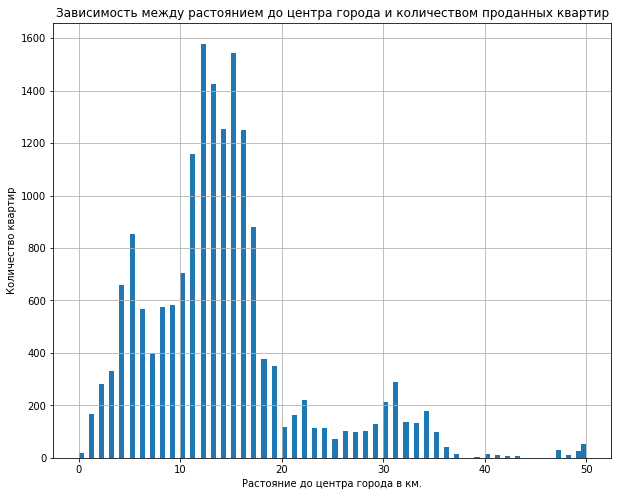

In [65]:

data['city_centers_nearest_km'].hist(bins=100, range=(0, 50), figsize=(10, 8))
plt.title('Зависимость между растоянием до центра города и количеством проданных квартир')
plt.xlabel('Растояние до центра города в км.')
plt.ylabel('Количество квартир')
plt.show()

 По графику можно сказать, что большинство квартир находятся в 12-15 км от центра. Стоит учитывать, что в картографических столбах много пропусков.

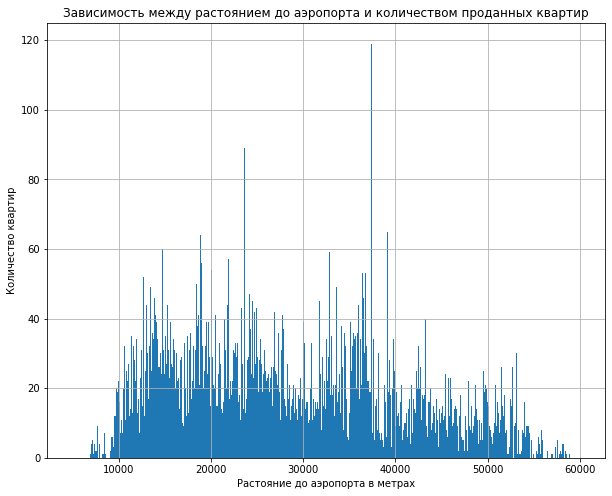

In [66]:

data['airports_nearest'].hist(bins=1000, range=(5000, 60000), figsize=(10, 8))
plt.title('Зависимость между растоянием до аэропорта и количеством проданных квартир')
plt.xlabel('Растояние до аэропорта в метрах')
plt.ylabel('Количество квартир')
plt.show()

Из данных, которыми мы располагаем, можно сделать вывод, что большинство квартир в радиусе 15-35 км от аэропорта.

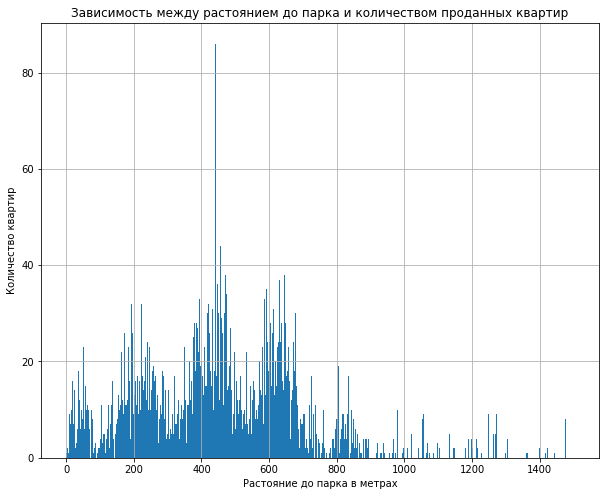

In [67]:

data['parks_nearest'].hist(bins=1000,range=(0, 1500),  figsize=(10, 8))
plt.title('Зависимость между растоянием до парка и количеством проданных квартир')
plt.xlabel('Растояние до парка в метрах')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир находятся в шаговой доступности к паркам.

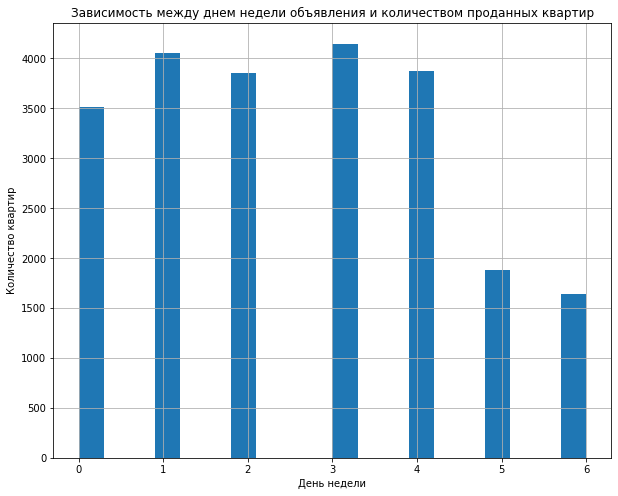

In [68]:

data['day'].hist(bins=20,range=(0, 6),  figsize=(10, 8))
plt.title('Зависимость между днем недели объявления и количеством проданных квартир')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

По будням объявлений больше чем по выходным.

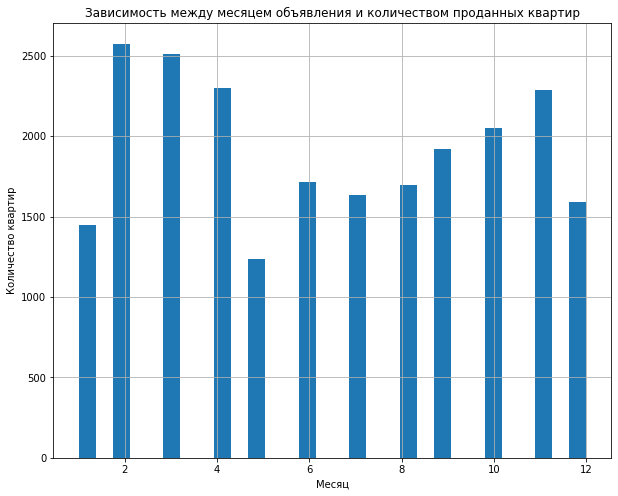

In [69]:

data['mounth'].hist(bins=30,range=(1, 12),  figsize=(10, 8))
plt.title('Зависимость между месяцем объявления и количеством проданных квартир')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Большинство объявлений приходится на февраль, март, апрель и ноябрь. Меньше всего объявлений в мае и январе.

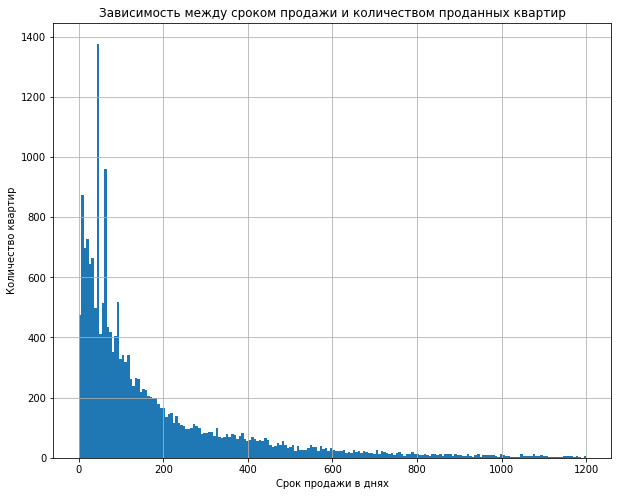

In [70]:
)
data['days_exposition'].hist(bins=200, range=(0, 1200), figsize=(10, 8))
plt.title('Зависимость между сроком продажи и количеством проданных квартир')
plt.xlabel('Срок продажи в днях')
plt.ylabel('Количество квартир')
plt.show()

In [71]:
data['days_exposition'].describe()

count    19900.000000
mean       180.117085
std        218.679599
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

По графику видно, что половина объявлений снято с публикации за 95 дней. 75%  объявлений висят до 230 дней. Некоторые висят целых 5 лет. А среднее арефметическое 180. Объявление чаще всего активно около 3-4 месяцев. Быстрыми продажами можно назвать продажи от 0 до 45 дней. Крайне долгие продажи занимают больше 230 дней.

In [72]:
data1.corr()

,total_area,kitchen_area,living_area,rooms,last_price,days_exposition,city_centers_nearest,ceiling_height
total_area,1.000000,0.561046,0.917275,0.787304,0.714724,0.153233,-0.239698,0.398634
kitchen_area,0.561046,1.000000,0.345940,0.214003,0.494818,0.098829,-0.183583,0.352451
living_area,0.917275,0.345940,1.000000,0.884178,0.599114,0.141037,-0.224558,0.340246
rooms,0.787304,0.214003,0.884178,1.000000,0.431134,0.115236,-0.172372,0.202309
last_price,0.714724,0.494818,0.599114,0.431134,1.000000,0.109301,-0.294470,0.377511
days_exposition,0.153233,0.098829,0.141037,0.115236,0.109301,1.000000,-0.053494,0.100426
city_centers_nearest,-0.239698,-0.183583,-0.224558,-0.172372,-0.294470,-0.053494,1.000000,-0.300169
ceiling_height,0.398634,0.352451,0.340246,0.202309,0.377511,0.100426,-0.300169,1.000000


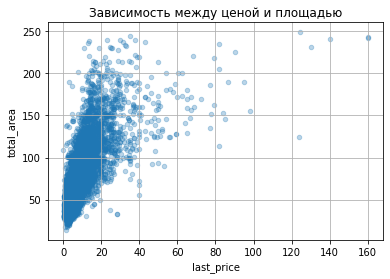

In [73]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, grid=True)
plt.title('Зависимость между ценой и площадью')
plt.show()

Зависимость между ценой и количеством квадратных метров прослеживается в квартирах, стоимостью до 40-50 млн рублей. 

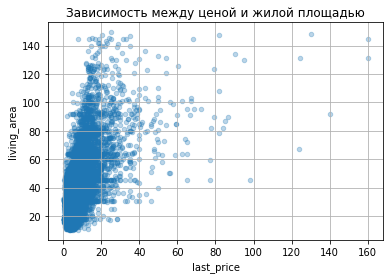

In [74]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, grid=True)
plt.title('Зависимость между ценой и жилой площадью')
plt.show()

График почти аналогичен с прошлым. Можно сказать, что количество кв метров жилой площади влияет на стоимость квартиры.

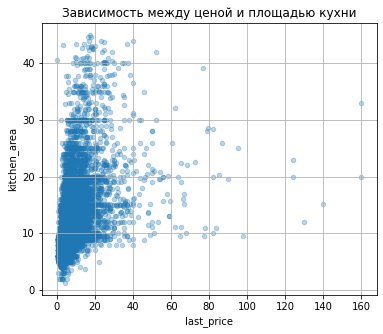

In [75]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3, grid=True,figsize=(6,5))
plt.title('Зависимость между ценой и площадью кухни')
plt.show()

Зависимость меджу кв метрами кухни и стоимости квартиры есть. 

In [76]:
data_pivot = 
data_pivot.columns = ['last_price']

Чем больше комнат, тем в среднем дороже квартира.

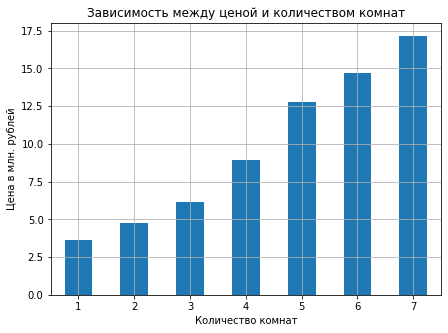

In [80]:

data_pivot.plot(grid=True, kind='bar', figsize=(7, 5), legend=False)
plt.title('Зависимость между ценой и количеством комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена в млн. рублей')
plt.xticks(rotation=0)
plt.show()

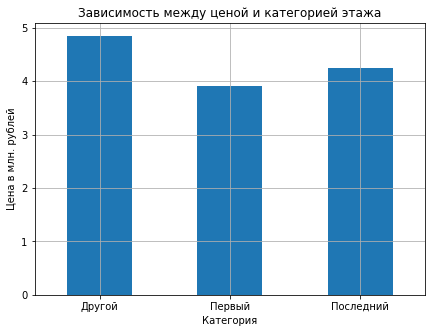

In [81]:
data_pivot1 = data.pivot_table(index='cat_floor', values='last_price', aggfunc=['median'])
data_pivot1.plot(grid=True, kind='bar', figsize=(7, 5), legend=False)
plt.title('Зависимость между ценой и категорией этажа')
plt.xlabel('Категория')
plt.ylabel('Цена в млн. рублей')
plt.xticks(rotation=0)
plt.show()

Квартира на 1 этаже зачастую дешевле чем на других.

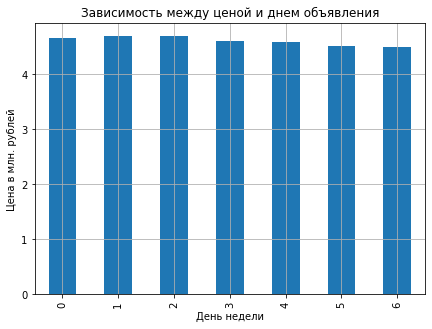

In [82]:

data_pivot2 = data.pivot_table(index='day', values='last_price', aggfunc=['median'])
data_pivot2.columns = ['last_price']
data_pivot2.plot(grid=True, kind='bar', figsize=(7, 5), legend=False)
plt.title('Зависимость между ценой и днем объявления')
plt.xlabel('День недели')
plt.ylabel('Цена в млн. рублей')
plt.show()


Цена не зависит от дня объявления.

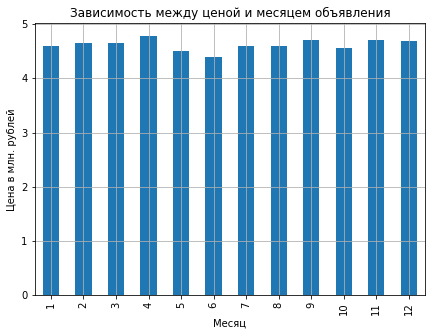

In [83]:
data_pivot3 = data.pivot_table(index='mounth', values='last_price', aggfunc=['median'])
data_pivot3.columns = ['last_price']
data_pivot3.plot(grid=True, kind='bar', figsize=(7, 5), legend=False)
plt.title('Зависимость между ценой и месяцем объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена в млн. рублей')
plt.show()


Цена не зависит от месяца объявления.

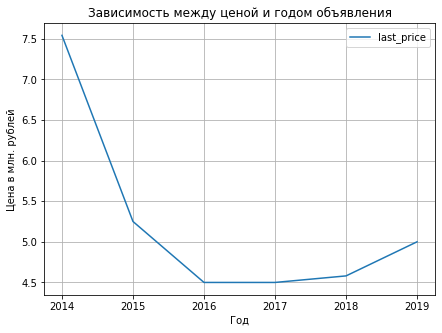

In [84]:

data_pivot4 = data.pivot_table(index='year', values='last_price', aggfunc=['median'])
data_pivot4.columns = ['last_price']
data_pivot4.plot(grid=True, figsize=(7, 5))
plt.title('Зависимость между ценой и годом объявления')
plt.xlabel('Год')
plt.ylabel('Цена в млн. рублей')
plt.show()

In [85]:
data.groupby('year')['year'].count()

year
2014     134
2015    1127
2016    2695
2017    7917
2018    8284
2019    2811
Name: year, dtype: int64

Кризис недвижимости начался в 2014, с 2016 видим подъем рынка. Из года в год количество объявлений расло. В 2018 году был пик объявлений. В 2019 количество квартир сократилось в 3 раза, но цены выросли.

Больше всего на цену влияет год объявления и количество квадратных метров. Также квартиры не на первом этаже дороже. Надо посмотреть цену по городам, для более точных выводов.

In [86]:
data_group_price = data.groupby('locality_name')['price_metr'].agg({'count','median'}).sort_values(by='count', ascending=False)
data_group_price['median'] = data_group_price['median'] * 1000000
data_group_price['median'] = round(data_group_price['median'])
data_group_price.head(10)

,median,count
locality_name,,
Санкт-Петербург,103922.0,15205
поселок Мурино,82567.0,522
поселок Шушары,76574.0,434
Всеволожск,65511.0,389
Пушкин,99744.0,359
Колпино,74690.0,336
поселок Парголово,91517.0,323
Гатчина,67181.0,306
деревня Кудрово,89944.0,282


Дороже всего 1 кв метр стоит в Санкт-Петербурге. На втором месте Пушкин. Из списка 10ти населённых пунктов с наибольшим числом объявлений самым дешевым оказалcz Выборг. 

In [87]:
 data_sbp = data[data['locality_name'] == 'Санкт-Петербург']

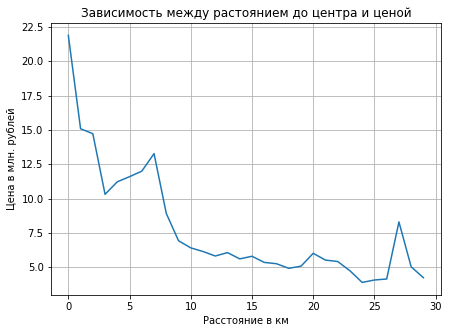

In [88]:
data_sbp_km =  data_sbp.groupby('city_centers_nearest_km')['last_price'].mean()
data_sbp_km.plot(grid=True, figsize=(7, 5))
plt.title('Зависимость между растоянием до центра и ценой')
plt.xlabel('Расстояние в км')
plt.ylabel('Цена в млн. рублей')
plt.show()

Чем ближе квартира к центру, тем она дороже. В радиусе 2 км средняя цена варируется от 17 до 35 млн руб. Анономальное значение встретилось на 27 км. Там всего 2 квартиры.

### Общий вывод


Итоги исследовательского анализа данных.  
<br /> 
- 1. Выявили зависимость между площадью и количеством квартир.  
  2. Зависимость между cтоимостью и количеством проданных квартир.
  3. Зависимость количества комнат и количества проданных квартир.
  4. Узнали на какие месяцы и дни приходится больше объявлений.   

 
- Выявили быстрые, медленные и средние продажи. Быстрыми считаются продажи до 45 дней. Средними можно считать продажи за 3 месяца. Медленные - продажи занимающие более 210 дней.     
<br /> 
- Рассмотрели зависимость между ценой и площадью.  
<br />  
- Построили сводные таблицы и по медианным значениям выявили следущие:  
  1. Квартиры на 1 этаже стоят дешевле.
  2. Из года в год количество объявлений расло и квартиры дорожали. В 2018 году был пик объявлений. В 2019 количество квартир сократилось в 2.5 раза, но цены не упали.  


- Дороже всего 1 кв метр стоит в Санкт-Петербурге. На втором месте Пушкин. Из списка 10ти населённых пунктов с наибольшим числом объявлений самым дешевым оказалcz Выборг.  


- Чем ближе квартира к центру северной столицы, тем она дороже. В радиусе 2 км средняя цена варируется от 17 до 35 млн. рублей.